# Домашнее задание № 8

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели.
Подготовить данные для последующей обработки. Для этого мы:

1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import statistics 
import matplotlib.pyplot as plt

#загружаем  датасет для работы
df = pd.read_excel('Data_set_00477.xlsx')

df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


## 1. Очистка данных и обработка пропусков
Первый столбец таблицы соответствует порядковому номеру строки и не несет в себе никакой нужной инфомации. Поэтому удалим его.

In [99]:
data_set = df.drop(df.columns[[0]], axis = 1)

data_set

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


### 1.2 Обработка пропусков
Проверим таблицу на наличие пропуска данных. Пропусками считаем незаполненные ячейки таблицы(Nan). Так же проверяем значения на равность нулю, исходя из гипотезы, что данные, внесенные в датафоейме не могут быть равны нулю, поскольку дата, возраст, расстояние, количество, широта, долгота и цена не могут быть равны нулю. Т.е. пропущенным занчением считаем значение элемента выборки, равного нулю

In [98]:
#проверим данные на наличие пустых значений
for col in data_set.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

X1 transaction date - 0%
X2 house age - 0%
X3 distance to the nearest MRT station - 0%
X4 number of convenience stores - 0%
X5 latitude - 0%
X6 longitude - 0%
Y house price of unit area - 0%


In [100]:
#проверка данных на равность нулю
for col in data_set.columns:
    pct_missing = np.mean(df[col] == 0)
    print('{} - {}%'.format(col, round(pct_missing*100)))

X1 transaction date - 0%
X2 house age - 4%
X3 distance to the nearest MRT station - 0%
X4 number of convenience stores - 16%
X5 latitude - 0%
X6 longitude - 0%
Y house price of unit area - 0%


Поскольку в таблицы есть значения равные нулю, построим тепловую карту пропущенных значений

<AxesSubplot:>

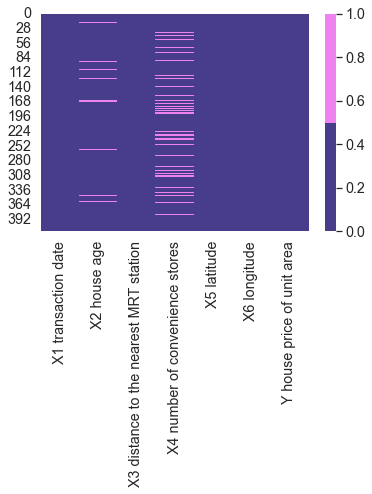

In [101]:
colours = ['#483D8B', '#EE82EE'] 
sns.heatmap(df[data_set.columns] == 0, cmap=sns.color_palette(colours))

Таким образом у нас есть пропущенные значения в сттолбце два(возраст) и столбце четыре(количество магазинов в шаговой доступности).
Для заполнения пропопущенных значений в выборке воспользуемся медианой выборки по каждому столбцу

In [102]:
cleaned_data_set = data_set.copy(deep=True)

#заполним пропущенные данные для второго столбца
x2_median = statistics.median(cleaned_data_set["X2 house age"])

cleaned_data_set.loc[(cleaned_data_set["X2 house age"] == 0), "X2 house age"] = x2_median

#заполним пропущенные данные для четвертого столбца
x4_median = statistics.median(cleaned_data_set["X4 number of convenience stores"])

cleaned_data_set.loc[(cleaned_data_set["X4 number of convenience stores"] == 0), "X4 number of convenience stores"] = x4_median

## 2. Нормализация данных
Для скалирования датасета в диапозоне от -1 до 1 будем использовать минмаксную нормализацию

In [103]:
mm_scalar = MinMaxScaler(feature_range=(-1, 1))

names = cleaned_data_set.columns

scalar_data = pd.DataFrame(mm_scalar.fit_transform(cleaned_data_set), columns = names)
scalar_data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.454545,0.448598,-0.980975,1.000000,0.233883,0.438646,-0.448590
1,-0.454545,-0.135514,-0.912381,0.777778,0.169898,0.422903,-0.370337
2,1.000000,-0.425234,-0.833370,-0.111111,0.342462,0.517792,-0.277525
3,0.818182,-0.425234,-0.833370,-0.111111,0.342462,0.517792,-0.141037
4,-0.636364,-0.813084,-0.886402,-0.111111,0.146389,0.486306,-0.353958
...,...,...,...,...,...,...,...
409,-0.272727,-0.406542,0.255641,-0.333333,-0.770238,-0.346992,-0.858053
410,-1.000000,-0.785047,-0.979249,0.777778,0.024237,0.500323,-0.228389
411,0.272727,-0.168224,-0.886278,0.333333,0.142996,0.430451,-0.399454
412,-0.272727,-0.668224,-0.974808,-0.111111,-0.159719,0.447919,-0.182894


## 3. Обработка выбросов

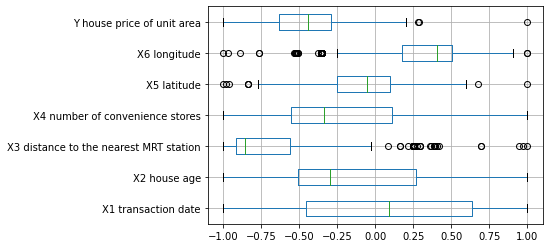

In [78]:
X1='X1 transaction date'
X2='X2 house age'
X3='X3 distance to the nearest MRT station'
X4='X4 number of convenience stores'
X5='X5 latitude'
X6='X6 longitude'
Y ='Y house price of unit area' 

scalar_data.boxplot(column=[X1,X2,X3,X4,X5,X6,Y], vert=0);

Исходя из гистограммы можно сделать вывод, что выбросы есть по столбцам X3, X5, X6, Y

In [83]:
import scipy.stats as stats

# Размерность исходного набора данных
print(f'Размерность исходного наборы данных : {scalar_data.shape}')

Q1 = scalar_data.quantile(0.25)
Q3 = scalar_data.quantile(0.75)
IQR= scalar_data.apply(stats.iqr)

clean_scalar_data=df[~((scalar_data < (Q1-1.5*IQR)) | (scalar_data > (Q3+1.5*IQR))).any(axis=1)]

# Размерность очищенного набора данных (метод межквартельного интревала)
print(f'Размерность очищенного набора данных (метод межквартельного интервала) : {clean_scalar_data.shape}')

clean_scalar_data

Размерность исходного наборы данных : (414, 7)
Размерность очищенного набора данных (метод межквартельного интервала) : (371, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
408,409,2013.416667,18.5,2175.74400,3,24.96330,121.51243,28.1
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


## 3. Построение матрицы корреляции

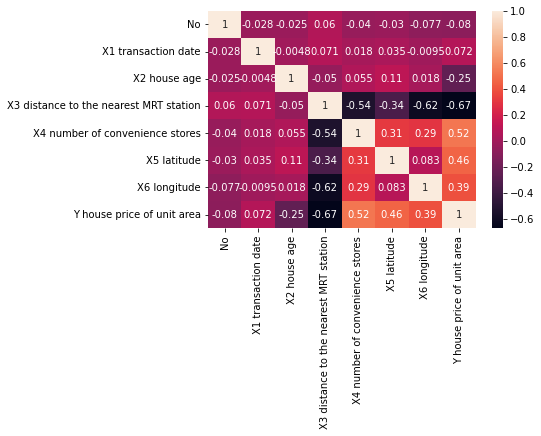

In [82]:
corr_matrix = clean_scalar_data.corr()
sns.heatmap(corr_matrix, annot=True);

Т.е. исходя из предоставленной выше матрицы значения слабо коррелируют между собой. 
Наибольшая положительная корреляция наблюдается между значениями между значением стоимости дома(Y) и значением количества магазинов в шаговой досутпности(Х4), роавное 0,52.
Так же наблюдается отрицательная корреляция между значением стоимости дома(Y) и расстоянием до ближайшего метро(Х3), равное 0,67

## Строим графики распределения

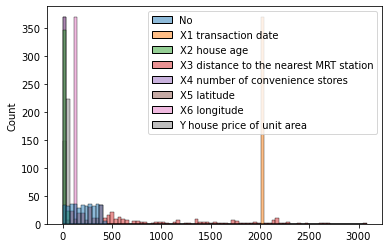

In [85]:
sns.histplot(clean_scalar_data);

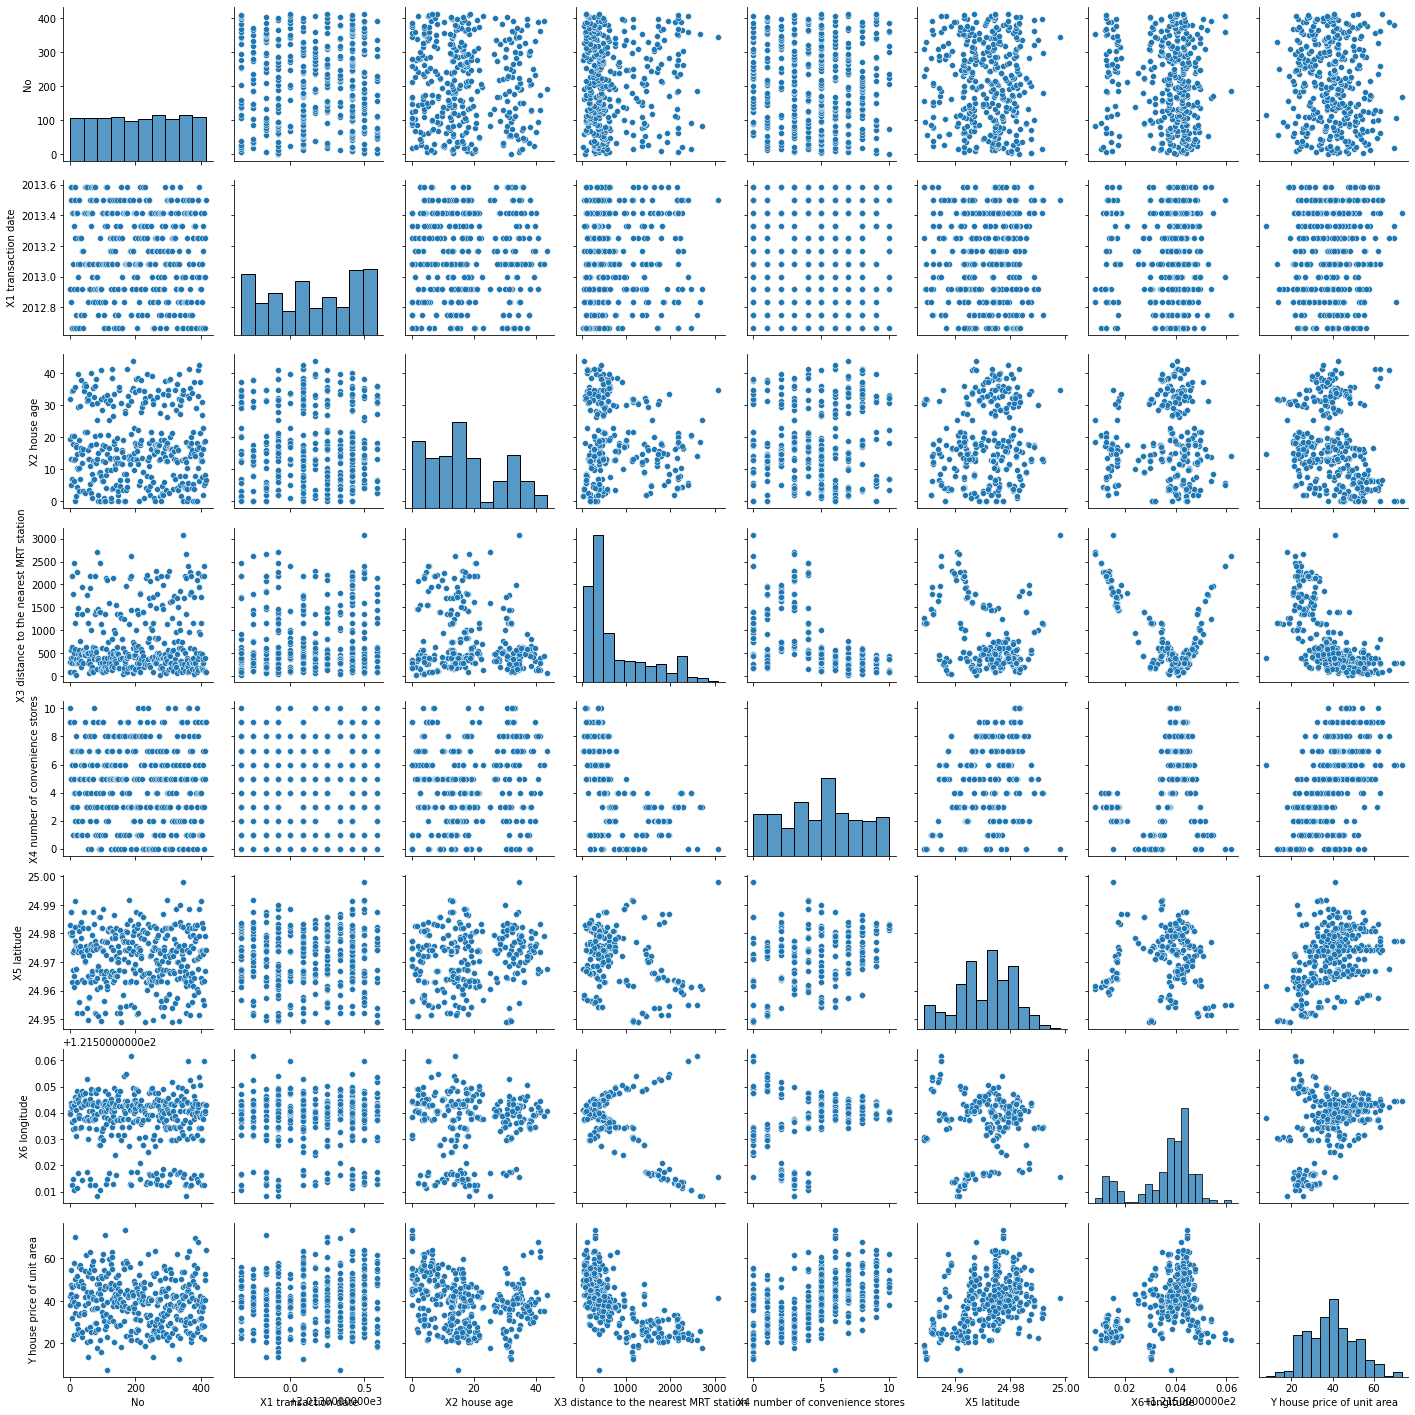

In [86]:
sns.pairplot(clean_scalar_data);

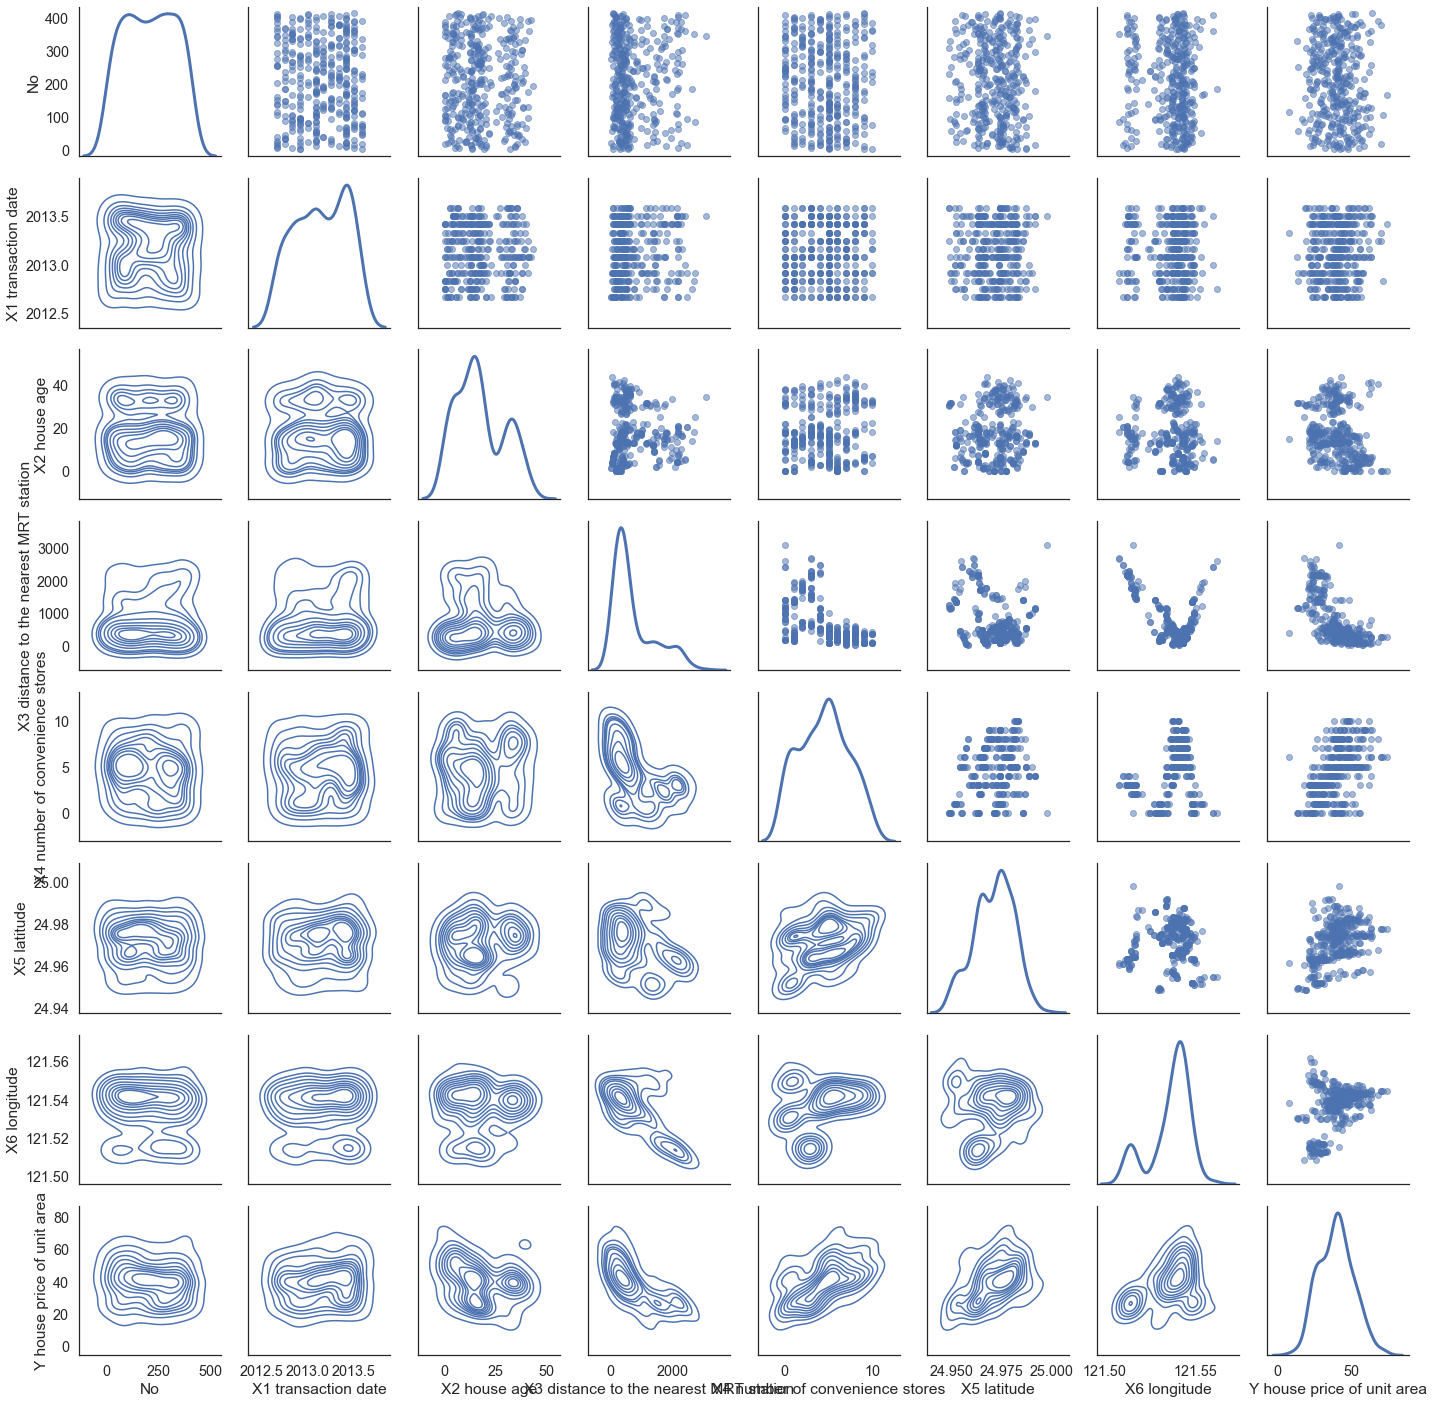

In [89]:
sns.set(style='white', font_scale=1.3)
g = sns.PairGrid(clean_scalar_data, diag_sharey=False,)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot, lw=3);

In [96]:
def shapiro_wilk_test(ser):
    stat, p = stats.shapiro(ser)

    alpha = 0.05
    if p > alpha:
        return 'Принять гипотезу о нормальности'
    else:
        return 'Отклонить гипотезу о нормальности'


for name in names:
    print(name, shapiro_wilk_test(clean_scalar_data[name]))

X1 transaction date Отклонить гипотезу о нормальности
X2 house age Отклонить гипотезу о нормальности
X3 distance to the nearest MRT station Отклонить гипотезу о нормальности
X4 number of convenience stores Отклонить гипотезу о нормальности
X5 latitude Отклонить гипотезу о нормальности
X6 longitude Отклонить гипотезу о нормальности
Y house price of unit area Принять гипотезу о нормальности
